In [1]:
import sys
from    StaccatoLab        import  *
import  numpy as np
import  matplotlib.pyplot  as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
version()

'StaccatoLab: version alpha.11'

# Minor Assignment *Bypass*

<img src="../images/Gbypass.png" alt="Drawing" style="width: 1000px;"/>

1. Program graph `G` from the above picture. All nodes have default (single-rate) flow behavior.
Hint: use Python list comprehensions and/or `path()`.
2. Simulate `G` for about 20 cycles, using `G.view(sim=True)`.
Use `G.plot_flow()` to plot the flow.
How large is the schedule period, counted in cycles? Explain.
3. The goal is to achieve period=1, coresponding to a smooth token flow with rate=1.
How much slack must be added to which edges? Explain.
(Use `e.init(S=n)` to define slack `n` to selected edges `e`.
4. Copy-paste graph into a new cell and add feedback edge `f` from `n[6]` to `n[0]`.
What is the period after this addition?
5. The goal is again to achieve rate=1.
With how many tokens must `f` be initialized to achieve rate=1? Explain.
(Use `e.init(D=n)` to initialize edge `e` with `n` tokens.)


Grading for the 5 questions: [2, 1, 3, 1, 3]

## Question 1

From the graph given, we can find out the number of nodes is 7. So we assume `node_num = 7`, and connect the nodes by following code.

In [2]:
def get_origin_graph():
    node_num = 7
    G = Graph()
    G.n = [Node() for i in range(node_num)]
    G.b = Edge(G.n[1], G.n[5])
    G.c = Edge(G.n[2], G.n[4])
    G.e = [Edge(G.n[i], G.n[i+1]) for i in range(node_num-1)]
    return G

G (Graph)         : no errors (flow-only graph)


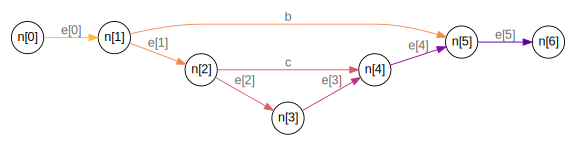

In [3]:
G = get_origin_graph()   
G.build();
G.plot_graph()

## Question 2

The simulations of `G` are listed below.

In [4]:
G.view(sim=True)

Output()

 #cycles real time  cpu time   #events  3(4)*  rate=1.000 Hz
      20     20.0s      0.1s        39  lasso=3(4)*
      20     20.0s      0.1s        39  pause


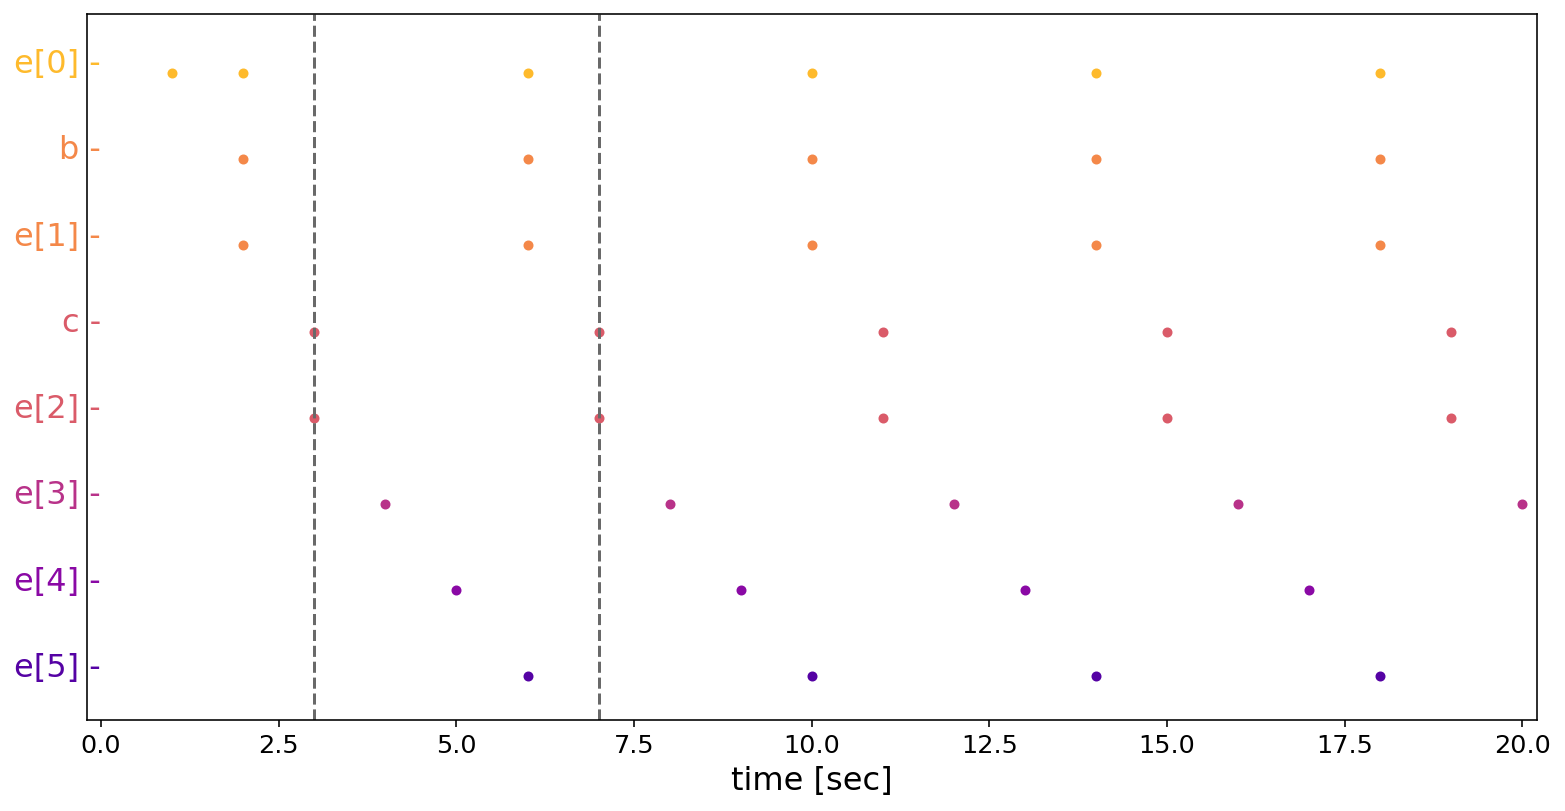

In [5]:
G.sim(T=20)
G.plot_flow(markersize=8);

We can see `lasso=3(4)*` in the output, which means after an initial segment of length 3, the length of the following cycle is 4 in this paticular case [[1]](#1). Therefore, the schedule period is **4** counted in cycles, because in default setting of `Graph()` (no specification on parameter `rate`), the graph rate is 1Hz, which means that the cycle time and real time are the same. For example, the first period is from `T=3` to `T=7`, the period in real time is 4, which is the same as the result counted in cycles.

## Question 3

To achieve `period = 1`, we need to set the slack of `b` and `c` to `4` and `2`, respectively, i.e. `G.b.init(S=4)` and `G.c.init(S=2)`.

In [6]:
def get_graph_Q3():
    # modify the graph based on the original one
    G = get_origin_graph()
    G.b.init(S=4)
    G.c.init(S=2)
    return G

Then we have the new graph:

G_Q3 (Graph)      : no errors (flow-only graph)


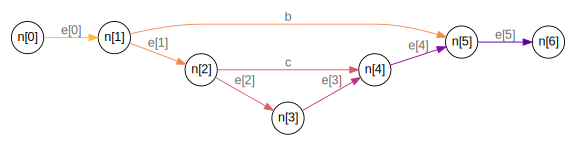

In [7]:
G_Q3 = get_graph_Q3()
G_Q3.build();
G_Q3.plot_graph()

We can check and conclude that the slack of edge `b` and `c` are successfully set by hovering over the edge labels. Then we perform the following simulation to demonstrate our modification:

 #cycles real time  cpu time   #events  6(1)*  rate=1.000 Hz
      20     20.0s      0.0s       150  lasso=6(1)*
      20     20.0s      0.0s       150  pause


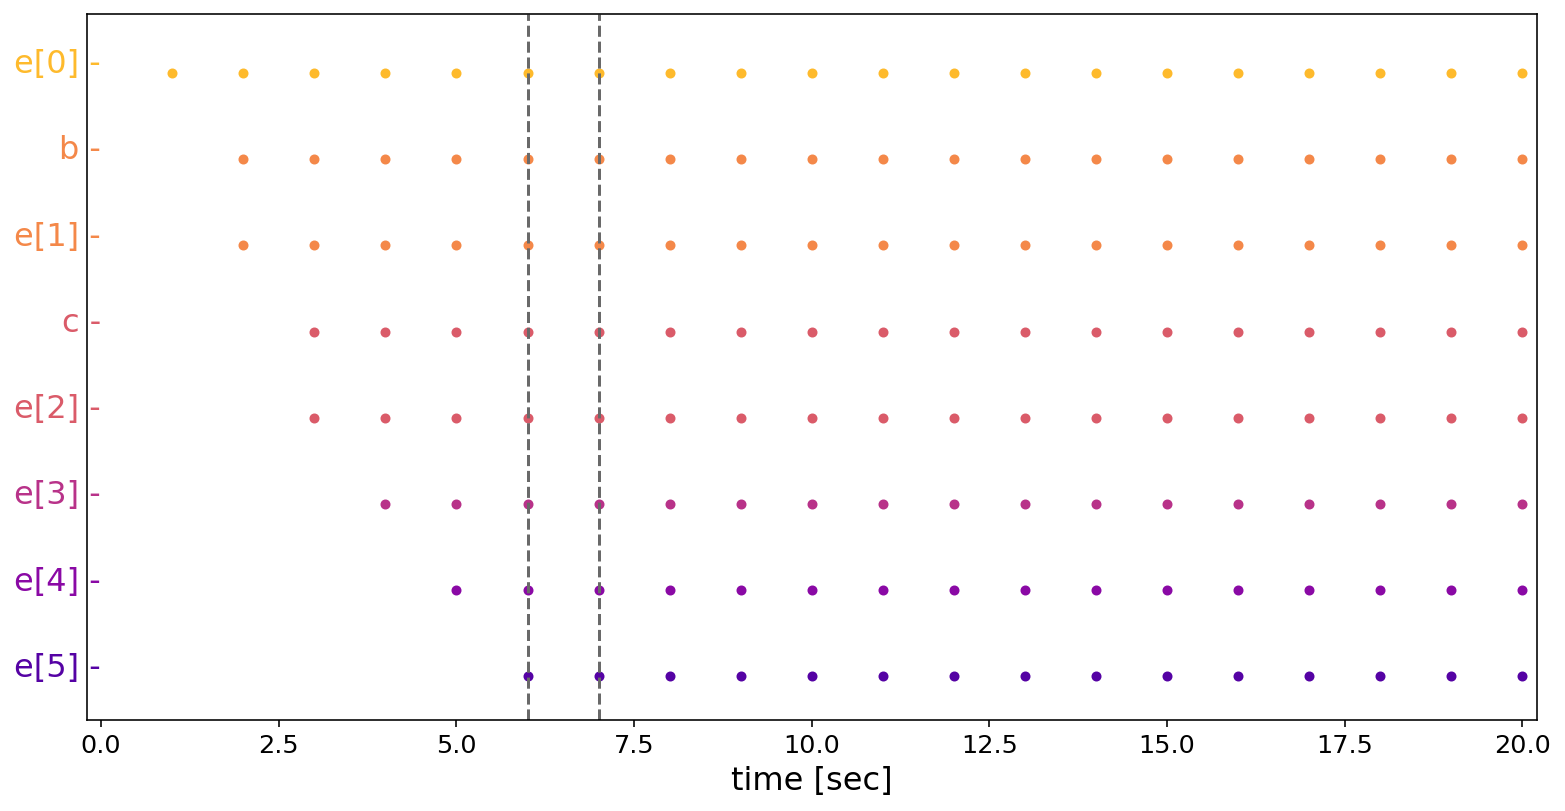

In [8]:
G_Q3.sim(T=20);
G_Q3.plot_flow(markersize=8);

From the simulation results below, we can see `lasso=6(1)*` indicating that this graph is of a 6-prelude followed by periodic behavior of 1 cycles, which satisfies our goal. 

### Reasons

Under the origin setting, after `n[1]` fires, `n[5]` has to wait 3 nodes to fire (`n[2]`, `n[3]` and `n[4]`), which leads to block on `n[1]`. So to ensure a smooth token flow with `rate=1`, edge `b` must allow `n[1]` to fire another 3 times. Hence, the proper slack of edge `b` is 1+3=4. The same reasoning can be applied on edge `c`.

## Question 4

As required, we have:

In [9]:
def get_graph_Q4():
    # modify the graph based on the one from Q3
    G = get_graph_Q3()
    G.f = Edge(G.n[6], G.n[0])
    return G

G_Q4 (Graph)      : no errors (flow-only graph)


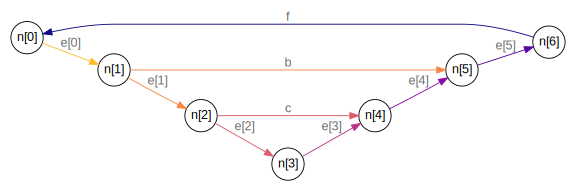

In [10]:
G_Q4 = get_graph_Q4()
G_Q4.build();
G_Q4.plot_graph()

After adding `f`, there is a loop in the graph. Because of the total number of tokens in the loop is 0, $\mu_{G\_Q4}=\infty$ makes this graph *dead* with this initialization. This is also proved by the following simulation (`quiescene`). Hence, the period does not exist.

In [11]:
G_Q4.view(sim=True)

Output()

## Question 5

We need to specify the graph based on the one from `Question 4` by assigning **7** tokens on `f`, initially. Thus we have

G_Q5 (Graph)      : no errors (flow-only graph)


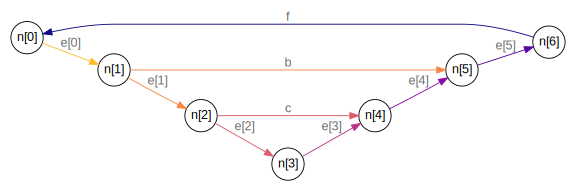

In [12]:
G_Q5 = get_graph_Q4()
# modify the graph based on the one from Q4
G_Q5.f.init(D=7)
G_Q5.build();
G_Q5.plot_graph()

We can check and conclude that the number of initial tokens on edge `f` are successfully set to 7 by hovering over the edge labels. Then we perform the following simulation to demonstrate our modification:

 #cycles real time  cpu time   #events  6(1)*  rate=1.000 Hz
      20     20.0s      0.0s       165  lasso=6(1)*
      20     20.0s      0.0s       165  pause


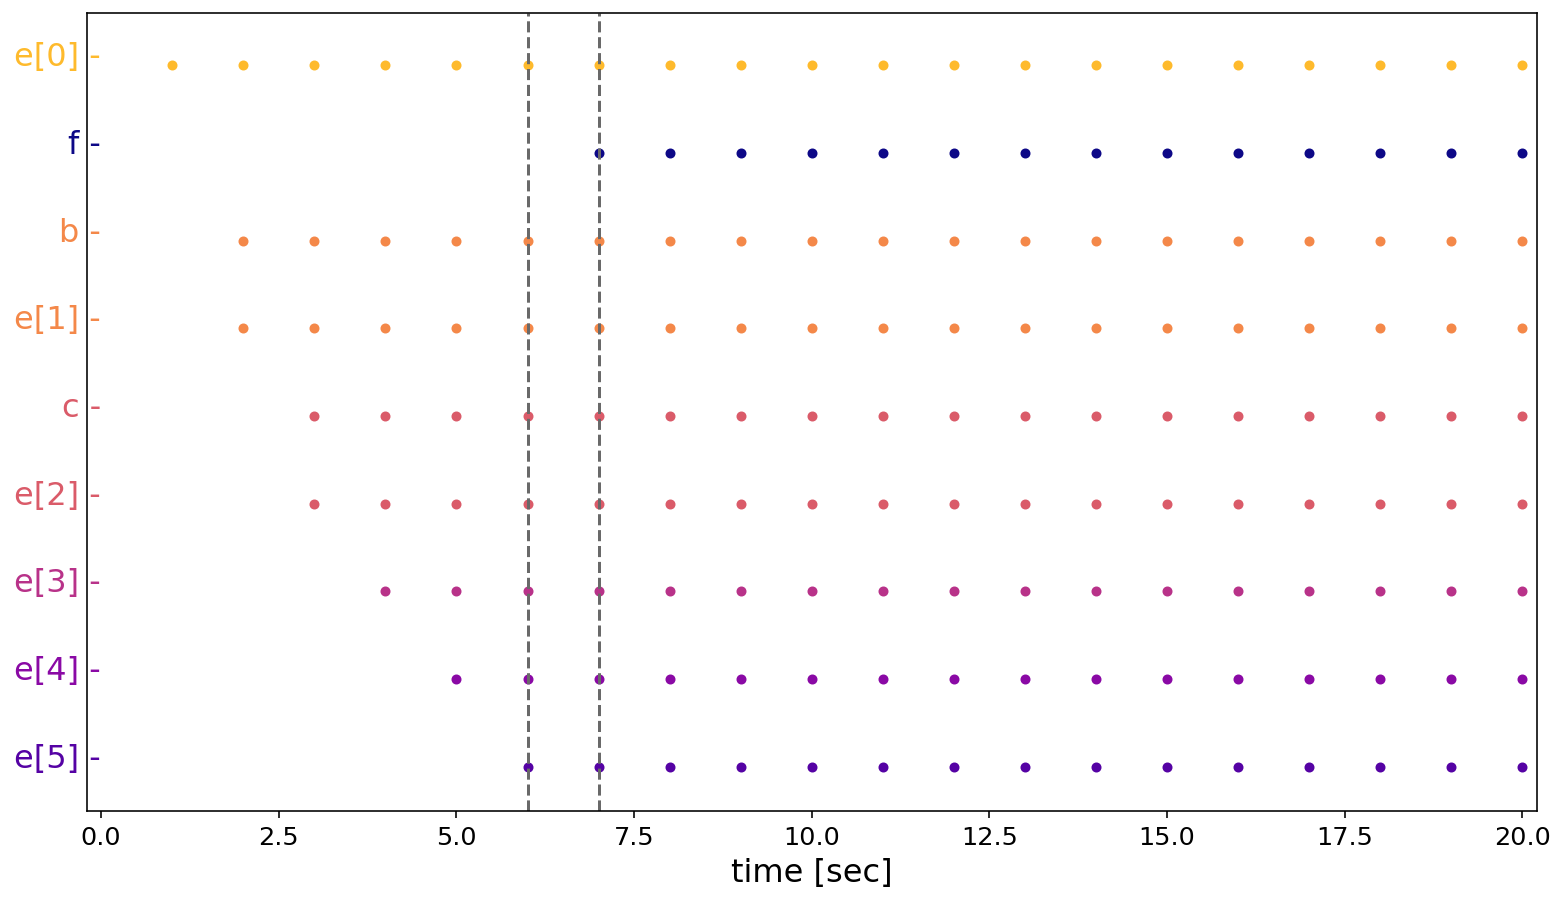

In [13]:
G_Q5.sim(T=20);
G_Q5.plot_flow(markersize=8);

We can see that `lasso=6(1)*` in the simulation, indicating that this graph has a period of length 1 after 6 cycles. This demonstrates that assigning 7 tokens on `f` initially is a feasible solution to achieve `rate=1`.

### Reasons

To ensure the period of the graph `G_Q5` is 1, is equivalent to make the maximum cycle mean (MCM) $\mu_{G\_Q5}=1$. From the lecture 2, we have the cycle mean of a loop $c$ is
$$
\mu_C = \frac{\sum t_C}{\sum d_C}
$$
where $\sum t_C$ is the total execution time of nodes in loop $c$, and $\sum d_C$ is the total number of tokens on the edges in loop $c$. And the MCM $\mu_G$ is the max of $\mu_C$. In this case, there is only one loop in the graph, and $\sum t_C = 7$, because the number of nodes in the loop is 7 and for each node, the executation time is 1 due to the default setting. Therefore, the total number of tokens should be set to 7, i.e. the number of initial tokens on edge `f` should be 7 in this particular case.

## Bibliography

<a id="1">[1]</a> Ghamarian, Amir Hossein, et al. "Throughput analysis of synchronous data flow graphs." Sixth International Conference on Application of Concurrency to System Design (ACSD'06). IEEE, 2006.